<a href="https://colab.research.google.com/github/Sumanth1242/MKsumanth_data690/blob/main/Assignment_05/Assignment_05_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is Jupyter Notebook?
### The Jupyter Notebook App is a web-based server-client tool for editing and running notebook papers. The Jupyter Notebook App can be run locally on a computer without internet access (as explained in this paper) or remotely on a server and accessible via the internet.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
x = np.linspace(0, 12, 500)
y = np.cumsum(np.random.randn(500,8), 0)

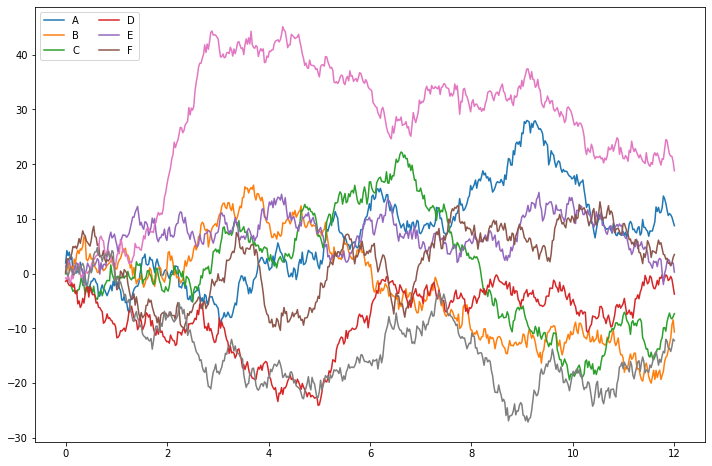

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')
plt.show()

# interfacing data

In [ ]:
import requests
import pandas as pd

In [ ]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [ ]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-02-27 04:18:26.023760')

In [ ]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [ ]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

# Bitcoin

In [ ]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-27 05:00:00,38637.15,38694.83,38500.56,38593.13,10.271630,3.965473e+05
2022-02-27 06:00:00,38579.76,38772.01,38482.91,38620.12,14.831298,5.736353e+05
2022-02-27 07:00:00,38648.04,38888.88,38646.67,38814.82,27.119317,1.051880e+06
2022-02-27 08:00:00,38814.81,38901.10,38789.91,38837.37,4.595978,1.785289e+05
2022-02-27 09:00:00,38841.57,38907.25,38659.86,38861.01,10.929474,4.241843e+05


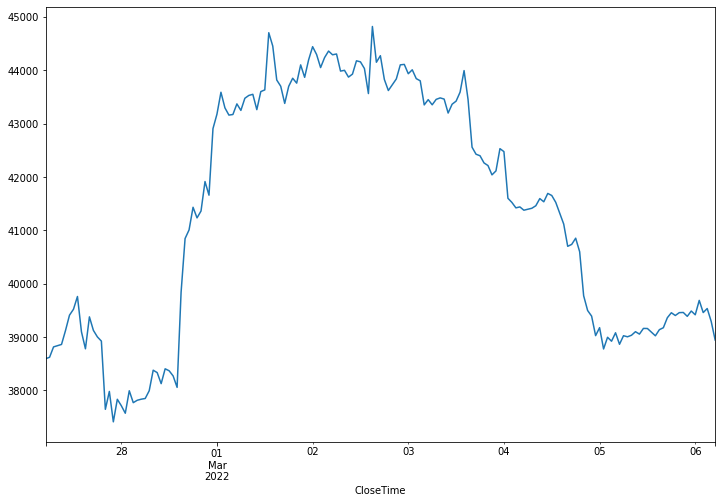

In [ ]:
btc['ClosePrice'].plot(figsize=(12,8))
plt.show()

In [ ]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-27 05:00:00,2714.18,2721.75,2703.00,2707.97,82.094881,2.226362e+05
2022-02-27 06:00:00,2708.16,2723.26,2699.81,2714.03,80.871043,2.195674e+05
2022-02-27 07:00:00,2710.55,2737.77,2710.55,2734.87,729.171686,1.986249e+06
2022-02-27 08:00:00,2735.17,2746.18,2735.17,2740.02,303.271282,8.310790e+05
2022-02-27 09:00:00,2735.95,2748.88,2725.00,2746.38,132.467992,3.624517e+05


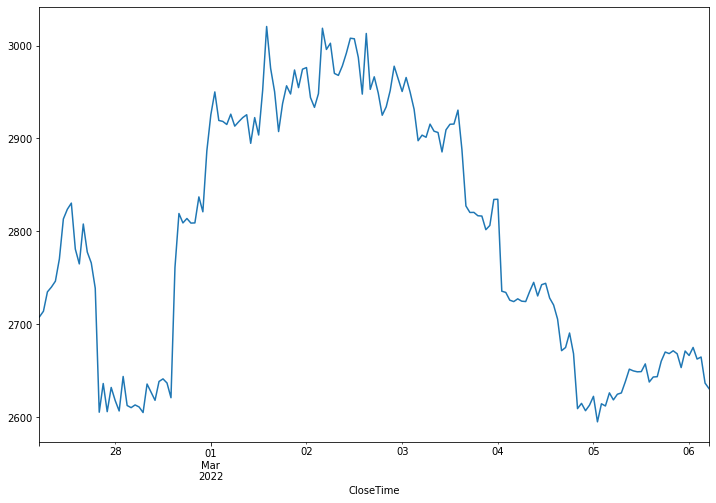

In [ ]:
eth['ClosePrice'].plot(figsize=(12, 8))
plt.show()

# Plots with Bokeh

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

In [ ]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

# Transfering to Excel

In [ ]:
writer = pd.ExcelWriter('cryptos.xlsx')
btc.to_excel(writer, sheet_name='Bitcoin')
eth.to_excel(writer, sheet_name='Ether')
writer.save()